## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = [0.8, 0.5, 0]

In [14]:
results = {}

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    for mn in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        print("Experiment with Momentum = %.2f" % (mn))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mn)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp: lr-%s ; Momen-%s" % (str(lr), str(mn))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.010000
Experiment with Momentum = 0.80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/500

Epoch 14/30
50000/50000 [==============================] - 9s 189us/step - loss: 1.4351 - acc: 0.4915 - val_loss: 1.5296 - val_acc: 0.4525
Epoch 15/30
50000/50000 [==============================] - 10s 200us/step - loss: 1.4198 - acc: 0.4997 - val_loss: 1.5421 - val_acc: 0.4596
Epoch 16/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.4102 - acc: 0.5014 - val_loss: 1.6050 - val_acc: 0.4338
Epoch 17/30
50000/50000 [==============================] - 9s 183us/step - loss: 1.3872 - acc: 0.5111 - val_loss: 1.5897 - val_acc: 0.4363
Epoch 18/30
50000/50000 [==============================] - 10s 194us/step - loss: 1.3787 - acc: 0.5131 - val_loss: 1.5246 - val_acc: 0.4614
Epoch 19/30
50000/50000 [==============================] - 10s 194us/step - loss: 1.3623 - acc: 0.5188 - val_loss: 1.4657 - val_acc: 0.4818
Epoch 20/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.3483 - acc: 0.5241 - val_loss: 1.5079 - val_acc: 0.4697
Epoch 21/30
50000/50000 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 197us/step - loss: 2.1715 - acc: 0.2308 - val_loss: 2.0602 - val_acc: 0.2821
Epoch 2/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.9925 - acc: 0.3029 - val_loss: 1.9455 - val_acc: 0.3213
Epoch 3/30
50000/50000 [==============================] - 10s 191us/step - loss: 1.9073 - acc: 0.3341 - val_loss: 1.8793 - val_acc: 0.3413
Epoch 4/30
50000/50000 [==============================] - 10s 191us/step - loss: 1.8563 - acc: 0.3519 - val_loss: 1.8392 - val_acc: 0.3606
Epoch 5/30
50000/50000 [==============================] - 10s 192us/step - loss: 1.8198 - acc: 0.3641 - val_loss: 1.8103 - val_acc: 0.3741
Epoch 6/30
50000/50000 [==============================] - 10s 191us/step - loss: 1.7904 - acc: 0.3757 - val_loss: 1.7815 - val_acc: 0.3765
Epoch 7/30
50000/50000 [==============================] - 10s 191us/step - loss: 1.7652 - acc: 0.3824 - val_loss: 1.7

50000/50000 [==============================] - 9s 187us/step - loss: 1.7007 - acc: 0.4075 - val_loss: 1.7036 - val_acc: 0.4048
Epoch 22/30
50000/50000 [==============================] - 10s 192us/step - loss: 1.6932 - acc: 0.4104 - val_loss: 1.6969 - val_acc: 0.4096
Epoch 23/30
50000/50000 [==============================] - 9s 183us/step - loss: 1.6861 - acc: 0.4126 - val_loss: 1.6879 - val_acc: 0.4121
Epoch 24/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.6793 - acc: 0.4154 - val_loss: 1.6799 - val_acc: 0.4142
Epoch 25/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.6727 - acc: 0.4168 - val_loss: 1.6768 - val_acc: 0.4153
Epoch 26/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.6659 - acc: 0.4188 - val_loss: 1.6707 - val_acc: 0.4175
Epoch 27/30
50000/50000 [==============================] - 9s 184us/step - loss: 1.6599 - acc: 0.4205 - val_loss: 1.6637 - val_acc: 0.4197
Epoch 28/30
50000/50000 [=============

50000/50000 [==============================] - 9s 184us/step - loss: 2.1629 - acc: 0.2293 - val_loss: 2.1474 - val_acc: 0.2409
Epoch 5/30
50000/50000 [==============================] - 9s 187us/step - loss: 2.1340 - acc: 0.2449 - val_loss: 2.1208 - val_acc: 0.2503
Epoch 6/30
50000/50000 [==============================] - 9s 186us/step - loss: 2.1086 - acc: 0.2558 - val_loss: 2.0970 - val_acc: 0.2589
Epoch 7/30
50000/50000 [==============================] - 9s 172us/step - loss: 2.0857 - acc: 0.2669 - val_loss: 2.0754 - val_acc: 0.2716
Epoch 8/30
50000/50000 [==============================] - 9s 175us/step - loss: 2.0647 - acc: 0.2765 - val_loss: 2.0559 - val_acc: 0.2784
Epoch 9/30
50000/50000 [==============================] - 9s 184us/step - loss: 2.0457 - acc: 0.2840 - val_loss: 2.0376 - val_acc: 0.2886
Epoch 10/30
50000/50000 [==============================] - 9s 185us/step - loss: 2.0281 - acc: 0.2919 - val_loss: 2.0211 - val_acc: 0.2960
Epoch 11/30
50000/50000 [===================

50000/50000 [==============================] - 9s 187us/step - loss: 2.0468 - acc: 0.2925 - val_loss: 2.0448 - val_acc: 0.2923
Epoch 26/30
50000/50000 [==============================] - 9s 190us/step - loss: 2.0396 - acc: 0.2952 - val_loss: 2.0378 - val_acc: 0.2948
Epoch 27/30
50000/50000 [==============================] - 9s 185us/step - loss: 2.0326 - acc: 0.2972 - val_loss: 2.0309 - val_acc: 0.2966
Epoch 28/30
50000/50000 [==============================] - 9s 189us/step - loss: 2.0257 - acc: 0.2990 - val_loss: 2.0243 - val_acc: 0.2993
Epoch 29/30
50000/50000 [==============================] - 9s 188us/step - loss: 2.0191 - acc: 0.3015 - val_loss: 2.0180 - val_acc: 0.3012
Epoch 30/30
50000/50000 [==============================] - 9s 183us/step - loss: 2.0127 - acc: 0.3036 - val_loss: 2.0118 - val_acc: 0.3043
Experiment with LR = 0.000100
Experiment with Momentum = 0.00
_________________________________________________________________
Layer (type)                 Output Shape         

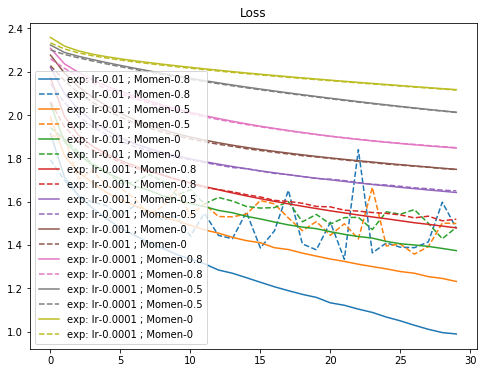

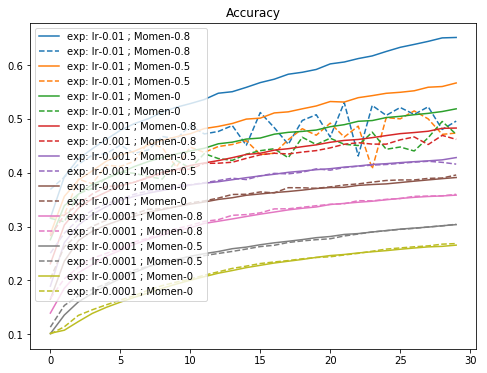

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()